<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_1_6_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_1.6_n20.csv',
 'data_add_delta_1.6_n30.csv',
 'data_add_delta_1.6_n60.csv',
 'data_add_delta_1.6_n120.csv',
 'data_add_delta_1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.334061,86.697420,36.144545,-44.909187,161.266839,456.361596,-295.094758
1,0.0,1.0,87.431618,77.679144,85.294655,1635.323707,1895.729123,1117.163962,778.565161
2,0.0,2.0,44.937973,21.921816,75.683838,-53.395717,99.147911,158.141432,-58.993521
3,0.0,3.0,81.863757,23.104065,48.577776,-209.597508,-46.051910,39.269044,-85.320954
4,0.0,4.0,53.100051,70.597758,86.007082,32.002904,251.707794,837.801681,-586.093887
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,64.338035,56.792376,65.466699,257.314503,453.911612,369.900743,84.010870
29996,999.0,26.0,27.420459,84.692335,30.039062,-1853.950126,-1701.798270,78.218256,-1780.016527
29997,999.0,27.0,53.586355,73.550781,47.197827,1247.391366,1431.726329,-5.061832,1436.788161
29998,999.0,28.0,73.539311,82.445372,46.071360,-946.370647,-734.314604,-610.737406,-123.577199


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.334061,86.697420,36.144545,-44.909187,161.266839,456.361596,-295.094758
1,0.0,1.0,87.431618,77.679144,85.294655,1635.323707,1895.729123,1117.163962,778.565161
2,0.0,2.0,44.937973,21.921816,75.683838,-53.395717,99.147911,158.141432,-58.993521
3,0.0,3.0,81.863757,23.104065,48.577776,-209.597508,-46.051910,39.269044,-85.320954
4,0.0,4.0,53.100051,70.597758,86.007082,32.002904,251.707794,837.801681,-586.093887
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,64.338035,56.792376,65.466699,257.314503,453.911612,369.900743,84.010870
29996,999.0,26.0,27.420459,84.692335,30.039062,-1853.950126,-1701.798270,78.218256,-1780.016527
29997,999.0,27.0,53.586355,73.550781,47.197827,1247.391366,1431.726329,-5.061832,1436.788161
29998,999.0,28.0,73.539311,82.445372,46.071360,-946.370647,-734.314604,-610.737406,-123.577199


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    73.334061  86.697420  ...   456.361596  -295.094758
      1.0    87.431618  77.679144  ...  1117.163962   778.565161
      2.0    44.937973  21.921816  ...   158.141432   -58.993521
      3.0    81.863757  23.104065  ...    39.269044   -85.320954
      4.0    53.100051  70.597758  ...   837.801681  -586.093887
...                ...        ...  ...          ...          ...
999.0 25.0   64.338035  56.792376  ...   369.900743    84.010870
      26.0   27.420459  84.692335  ...    78.218256 -1780.016527
      27.0   53.586355  73.550781  ...    -5.061832  1436.788161
      28.0   73.539311  82.445372  ...  -610.737406  -123.577199
      29.0   80.378029  64.373245  ... -1146.137893   648.895959

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    73.334061  86.697420  ...   456.361596  -295.094758
      1.0    87.431618  77.679144  ...  1117.163962   778.565161
      2.0    44.937973  21.921816  ...   158.141432   -58.993521
      3.0    81.863757  23.104065  ...    39.269044   -85.320954
      4.0    53.100051  70.597758  ...   837.801681  -586.093887
...                ...        ...  ...          ...          ...
999.0 25.0   64.338035  56.792376  ...   369.900743    84.010870
      26.0   27.420459  84.692335  ...    78.218256 -1780.016527
      27.0   53.586355  73.550781  ...    -5.061832  1436.788161
      28.0   73.539311  82.445372  ...  -610.737406  -123.577199
      29.0   80.378029  64.373245  ... -1146.137893   648.895959

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,73.334061,86.697420,36.144545,-44.909187,161.266839,456.361596,-295.094758
1,0.0,1.0,87.431618,77.679144,85.294655,1635.323707,1895.729123,1117.163962,778.565161
2,0.0,2.0,44.937973,21.921816,75.683838,-53.395717,99.147911,158.141432,-58.993521
3,0.0,3.0,81.863757,23.104065,48.577776,-209.597508,-46.051910,39.269044,-85.320954
4,0.0,4.0,53.100051,70.597758,86.007082,32.002904,251.707794,837.801681,-586.093887
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,64.338035,56.792376,65.466699,257.314503,453.911612,369.900743,84.010870
29996,999.0,26.0,27.420459,84.692335,30.039062,-1853.950126,-1701.798270,78.218256,-1780.016527
29997,999.0,27.0,53.586355,73.550781,47.197827,1247.391366,1431.726329,-5.061832,1436.788161
29998,999.0,28.0,73.539311,82.445372,46.071360,-946.370647,-734.314604,-610.737406,-123.577199


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    73.334061  86.697420  ...   456.361596  -295.094758
      1.0    87.431618  77.679144  ...  1117.163962   778.565161
      2.0    44.937973  21.921816  ...   158.141432   -58.993521
      3.0    81.863757  23.104065  ...    39.269044   -85.320954
      4.0    53.100051  70.597758  ...   837.801681  -586.093887
...                ...        ...  ...          ...          ...
999.0 25.0   64.338035  56.792376  ...   369.900743    84.010870
      26.0   27.420459  84.692335  ...    78.218256 -1780.016527
      27.0   53.586355  73.550781  ...    -5.061832  1436.788161
      28.0   73.539311  82.445372  ...  -610.737406  -123.577199
      29.0   80.378029  64.373245  ... -1146.137893   648.895959

[30000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

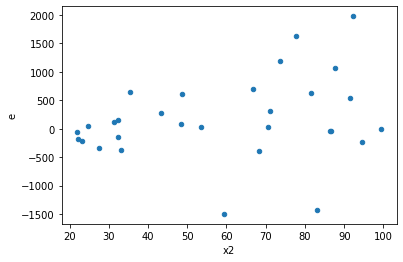

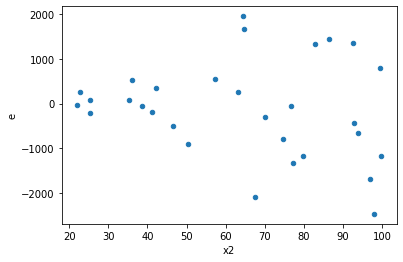

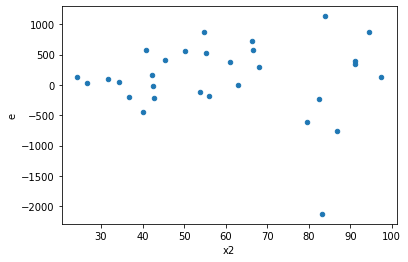

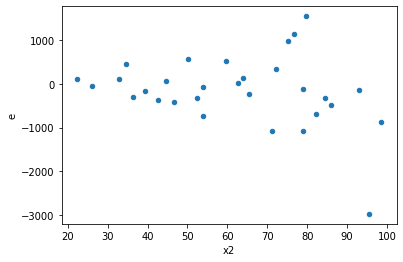

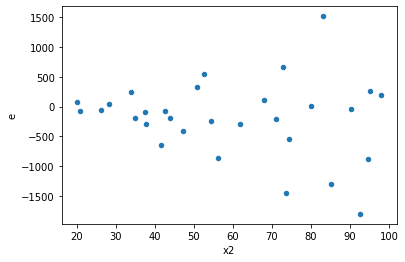

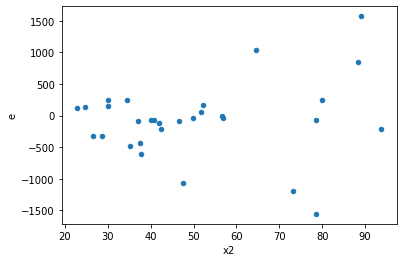

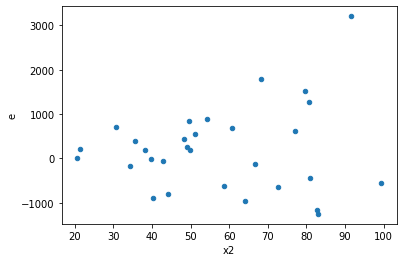

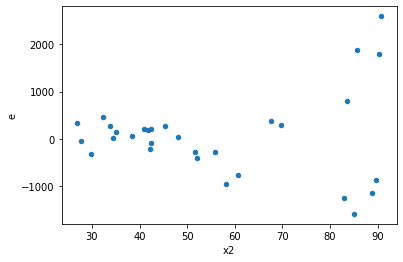

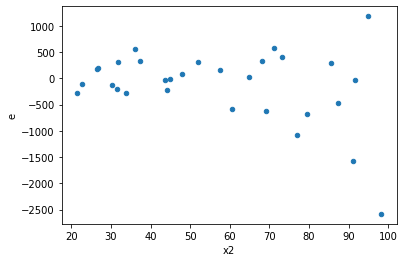

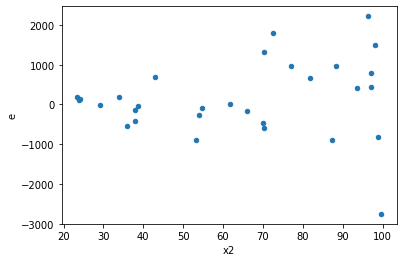

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,9.0,9.0,3901103.1161944405,426501.61648799747,487637.88952430506,53312.70206099968,9.14674872352852,0.0029261089616572367,0.9985369455191714,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,14917722.154195689,1571309.075342808,1864715.269274461,196413.634417851,9.493817854352514,0.0025405514670844287,0.9987297242664578,Reject001=0 : Heteroscedasticity
2.0,9.0,9.0,6278195.031935933,774117.4088249772,784774.3789919916,96764.67610312215,8.110132856287942,0.004589748263821969,0.997705125868089,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,7457567.033335499,855328.4893803168,932195.8791669374,106916.0611725396,8.718950819396284,0.0035046494305293052,0.9982476752847353,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,8750869.067755025,400875.2314733163,1093858.633469378,50109.40393416454,21.8294082066218,8.983326881617515e-05,0.9999550833655919,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,4964410.72756191,724305.8324835799,620551.3409452387,90538.22906044748,6.8540256131023956,0.008468487735227903,0.995765756132386,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,9514553.635106856,1535915.285694238,1189319.204388357,191989.41071177975,6.194712510336306,0.012107933484306166,0.9939460332578469,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,17581289.411352903,516211.3620929007,2197661.176419113,64526.420261612584,34.058315454491805,1.3634286123442863e-05,0.9999931828569383,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,6913380.951971362,741501.9047594138,864172.6189964203,92687.73809492672,9.32348373968704,0.0027214811077933554,0.9986392594461033,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,3901103.1161944405,426501.61648799747,487637.88952430506,53312.70206099968,9.14674872352852,0.0029261089616572367,Reject001=0 : Heteroscedasticity
1.0,9.0,9.0,14917722.154195689,1571309.075342808,1864715.269274461,196413.634417851,9.493817854352514,0.0025405514670844287,Reject001=0 : Heteroscedasticity
2.0,9.0,9.0,6278195.031935933,774117.4088249772,784774.3789919916,96764.67610312215,8.110132856287942,0.004589748263821969,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,7457567.033335499,855328.4893803168,932195.8791669374,106916.0611725396,8.718950819396284,0.0035046494305293052,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,8750869.067755025,400875.2314733163,1093858.633469378,50109.40393416454,21.8294082066218,8.983326881617515e-05,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,4964410.72756191,724305.8324835799,620551.3409452387,90538.22906044748,6.8540256131023956,0.008468487735227903,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,9514553.635106856,1535915.285694238,1189319.204388357,191989.41071177975,6.194712510336306,0.012107933484306166,Reject001=1 : Homoscedasticity
7.0,9.0,9.0,17581289.411352903,516211.3620929007,2197661.176419113,64526.420261612584,34.058315454491805,1.3634286123442863e-05,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,6913380.951971362,741501.9047594138,864172.6189964203,92687.73809492672,9.32348373968704,0.0027214811077933554,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    746
Reject001=1 : Homoscedasticity      254
Name: Result_test, dtype: int64